# Figure 2.1 "The Elements of Statistical Learning"

Inicialmente importamos la libreria necesaria

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

AC: Lo que queremos es representar el gráfico 2.1 del libro The Elements of Statistical Learning , para lo cual, comenzaré creando una función que me entregue todos los puntos de un gráfico.

In [146]:
def puntos_grafico(L1,L2,L3,L4,sep): #L1:abscisa(-), L2:abscisa(+), L3:ordenada(-), L4:ordenada(+), sep:separación entre puntos
    lista_puntos = []
    distancia_horizontal = np.abs(L2-L1)
    distancia_vertical = np.abs(L4-L3)
    numero_puntos_horizontales = (distancia_horizontal / sep) + 1
    numero_puntos_verticales = (distancia_vertical / sep) + 1
    pto_referencia = [L1,L3]   #siempre comenzaré desde el punto más negativo
    for i in range(int(numero_puntos_horizontales)):
        for j in range(int(numero_puntos_verticales)):
            lista_puntos.append(pto_referencia)
            pto_referencia = [pto_referencia[0],pto_referencia[1] + sep]
        pto_referencia = [pto_referencia[0] + sep, L3]
    return lista_puntos

Probemos

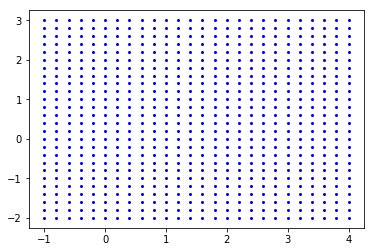

In [149]:
p=puntos_grafico(-1,4,-2,3,0.2)
p=np.array(p)
pT= p.transpose()
plt.plot(pT[0],pT[1],"bo",markersize = 2)
plt.show()

Ahora podemos reproducir de mejor manera la figura 2.1. Para llevar a cabo esto, primero simularemos los datos que se usarán y luego estos datos, junto con los puntos del plano, serán evaluados en la función predicción. Si el valor de la predicción es mayor a 0.5 el punto será clasificado como rojo, si es menor de 0.5 será azul y si es igual a 0.5 será negro.

### Simulación de datos

In [6]:
def centros_asociados_a_cada_color(color, kcentros):
   
    centro = np.array([0,0])
    covarianza = np.identity(2)
    
    if color == 0: #azul
        centro = np.array([1,0])
    
    if color == 1: #rojo
        centro = np.array([0,1])

    lista_de_centros = np.random.multivariate_normal(centro,covarianza,kcentros).T
        
    return lista_de_centros

In [7]:
centros_azul = centros_asociados_a_cada_color(0,10)
centros_azul

array([[-1.02067764,  0.78567766,  0.76584389,  2.68226819,  2.40361978,
         2.02660309,  1.53188178, -0.02463493,  0.79175683,  1.22321159],
       [ 1.15063552,  0.20058579, -1.326377  ,  0.43072739,  0.3531115 ,
        -0.17181391, -1.36286708, -1.50927919, -2.01694255,  0.75666101]])

In [9]:
centros_rojo = centros_asociados_a_cada_color(1,10)
centros_rojo

array([[-1.36908056, -0.86932438, -1.44195272,  0.85010675, -0.50841266,
        -0.26290773,  2.02490733,  0.77800234, -1.34504326,  0.08812223],
       [ 1.25090587,  2.40009539,  1.29347229,  1.40544625, -0.27257527,
         0.40543138,  0.91475672,  0.99734383,  0.56992601,  1.03401471]])

In [10]:
def visualize_colors(ptos_azul, ptos_rojo):

    x1azul = ptos_azul[0]
    x2azul = ptos_azul[1]
    
    x1rojo = ptos_rojo[0]
    x2rojo = ptos_rojo[1]
    
    plt.plot(x1azul,x2azul,"bo")
    plt.plot(x1rojo,x2rojo,"ro")
    plt.axis([-5,5,-5,5])
    plt.title("Distribucion de puntos segun el color")
    plt.show()

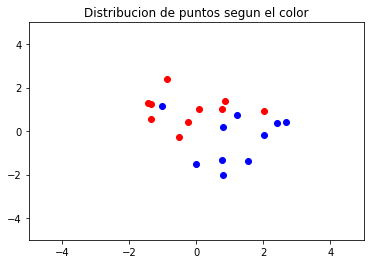

In [11]:
visualize_colors(centros_azul, centros_rojo)

In [12]:
def Simulacion_2(centros, N):
    
    Ncentros = centros.shape[1]
    
    #Initialize the list of observations 
    observations = np.zeros((2,N))
    
    #we first define the global value of the covariance
    covarianza = np.identity(2)/5
       
    #hacemos un loop entre 0 y N-1 para generar todos las observaciones requeridas
    
    for obs in range(0,N):
        #generamos un numero aleatorio entre 0 y 9 para escoger el centro de nuestra gaussiana bivariada
        indice_del_centro = random.randint(0, Ncentros-1)
        
        xcentro = centros[0,indice_del_centro]
        ycentro = centros[1,indice_del_centro]
        
        mk_centro = np.array([xcentro, ycentro])
        
        centro_aux = np.random.multivariate_normal(mk_centro,covarianza,1).T
    
        observations[0,obs] = centro_aux[0,0]
        observations[1,obs] = centro_aux[1,0]
    
    return observations

In [13]:
ptos_observados_azul =  Simulacion_2(centros_azul, 100)
ptos_observados_rojo =  Simulacion_2(centros_rojo, 100)

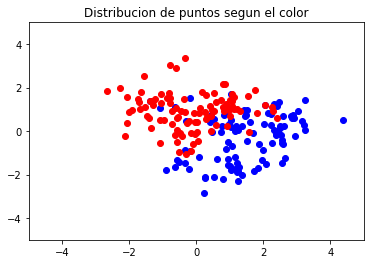

In [14]:
visualize_colors(ptos_observados_azul, ptos_observados_rojo)

Ahora generamos el SET que utilizaremos para la predicción

In [16]:
SET=[]

#Notar que estoy (BP) utilizando los puntos generados con la distribucion de gaussianas mezcladas. Ademas, 
#vamos a agregar directamente el valor de x0 al SET, por lo mencionado anteriormente. Ver notas adjuntas

#primero agregamos los vectores correspondientes a la distribución gaussiana azul (y=0) a la lista SET. 
x1azul = ptos_observados_azul[0,:]
x2azul = ptos_observados_azul[1,:]

x1rojo = ptos_observados_rojo[0,:]
x2rojo = ptos_observados_rojo[1,:]

for i in range(len(x1azul)):
    SET.append([1,x1azul[i],x2azul[i],0])

#Ahora agregamos los correspondientes a y=1 (distribución normal roja)
for i in range(len(x1rojo)):
    SET.append([1,x1rojo[i],x2rojo[i],1])

In [30]:
X=[]

#notice that now we have to put SET[i][1] y SET[i][2] en las componentes x1 y x2 de X
#on the other hand Y = SET[i][3]
for i in range(len(SET)):
    X.append([1,SET[i][1],SET[i][2]])

Y=[]
for i in range(len(SET)):
    Y.append(SET[i][3])

X=np.array(X)                     
Y=np.array(Y)

XT=X.transpose()

In [31]:
XTdotX = np.dot(XT,X)
XTdotX_inversa = np.linalg.inv(XTdotX)
XTdotX_inversa_dotXT = np.dot(XTdotX_inversa, XT)

In [32]:
beta_teorico = np.dot(XTdotX_inversa_dotXT,Y)
print(beta_teorico)

[ 0.54969324 -0.1746902   0.1909816 ]


In [33]:
def funcion_lineal(x1, x2, beta): 
    
    y_prediccion = beta[0] + x1*beta[1] + x2*beta[2]
    return y_prediccion  

In [125]:
lista_de_predicciones_azul = []
lista_de_predicciones_rojo = []

for pto in range(len(SET)):
    
    #prediccion de la funcion lineal como funcion de la posicion en el plano 2d y el valor teorico de beta
    #el cual se encontro minimizando algebraicamente RSS()

    prediccion = funcion_lineal(SET[pto][1], SET[pto][2], beta_teorico)

    #Utilizando el valor de la prediccion separamos entre puntos azules y rojos
    
    if (prediccion < 0.5):
        lista_de_predicciones_azul.append([SET[pto][1], SET[pto][2]])
    elif (prediccion == 0.5): #esto lo puse solo para ver si es que algún punto de la simulación debía ser catalogado como negro
        print("tenemos puntos negros")
    else:
        lista_de_predicciones_rojo.append([SET[pto][1], SET[pto][2]])

In [42]:
lista_de_predicciones_azul = np.array(lista_de_predicciones_azul)
lista_de_predicciones_azul_t = lista_de_predicciones_azul.transpose()
lista_de_predicciones_rojo = np.array(lista_de_predicciones_rojo)
lista_de_predicciones_rojo_t = lista_de_predicciones_rojo.transpose()

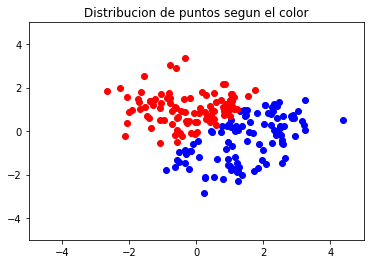

In [43]:
visualize_colors(lista_de_predicciones_azul_t, lista_de_predicciones_rojo_t)

Ok, ahora falta que aparezcan todos los puntos de ese plano y la linea negra que representa cuando la predicción es igual (o similar) a 0.5

### Incorporación de los puntos del plano

Para comenzar, generaré un nuevo SET que estará compuesto por todos los puntos del gráfico en estudio

In [114]:
SET_plano= puntos_grafico(-5,5,-5,5,0.2) #esto me entrega una lista con los puntos que viven en el plano, separados en 0.2
print(type(SET_plano),len(SET_plano))

<class 'list'> 2601


In [115]:
SET_plano_t = np.array(SET_plano).transpose()

Ahora podemos evaluar cada punto del plano en funcion_lineal() y ver si es mayor (será rojo), menor (será azul) o igual a 0.5 (será negro). Lamentablemente, ningún punto del plano, al pasar por la función funcion_lineal() me da un valor EXACTO de 0.5, por lo que ninguno de mis puntos está siendo clasificado como negro. Para arreglar esta situación puse un "margen de error" de 0.3, es decir, los puntos cuyas predicciones estuvieron entre 0.49 y 0.51 fueron clasificados como negros. 

In [174]:
lista_de_predicciones_azul_plano = []
lista_de_predicciones_rojo_plano = []
lista_de_predicciones_negro_plano = []

for pto in range(len(SET_plano)):
    
    prediccion = funcion_lineal(SET_plano[pto][0],SET_plano[pto][1],beta_teorico)
    
    if (prediccion <= 0.49):
        lista_de_predicciones_azul_plano.append([SET_plano[pto][0], SET_plano[pto][1]])
        
    elif (0.49 < prediccion < 0.51):        #margen de error
        lista_de_predicciones_negro_plano.append([SET_plano[pto][0], SET_plano[pto][1]])
        
    else:
        lista_de_predicciones_rojo_plano.append([SET_plano[pto][0], SET_plano[pto][1]])


In [175]:
lista_de_predicciones_azul_plano = np.array(lista_de_predicciones_azul_plano)
lista_de_predicciones_rojo_plano = np.array(lista_de_predicciones_rojo_plano)
lista_de_predicciones_negro_plano = np.array(lista_de_predicciones_negro_plano)

In [176]:
lista_de_predicciones_azul_plano_t = lista_de_predicciones_azul_plano.transpose()
lista_de_predicciones_rojo_plano_t = lista_de_predicciones_rojo_plano.transpose()
lista_de_predicciones_negro_plano_t = lista_de_predicciones_negro_plano.transpose()

Ahora modificaré un poco la función visualize_colors(), para que esta me pueda graficar todos los puntos del gráfico y los del SET original al mismo tiempo, pero con puntos de diferente tamaños.

In [181]:
def visualize_colors_new(ptos_azul, ptos_rojo, ptos_azul_plano,ptos_rojo_plano,ptos_negro_plano):

    if len(ptos_azul_plano)==0 and len(ptos_rojo_plano)==0 and len(ptos_negro_plano)==0 : #en este caso estamos frente a la 
        x1azul = ptos_azul[0]                                                             #funcion visualize_colors() original
        x2azul = ptos_azul[1]
    
        x1rojo = ptos_rojo[0]
        x2rojo = ptos_rojo[1]
    
        plt.plot(x1azul,x2azul,"bo")
        plt.plot(x1rojo,x2rojo,"ro")
        plt.axis([-5,5,-5,5])
        plt.title("Distribucion de puntos segun el color")
        plt.show()
    
    else:
        x1azul = ptos_azul[0]
        x2azul = ptos_azul[1]
        x1rojo = ptos_rojo[0]
        x2rojo = ptos_rojo[1]
        
        x1azul_plano = ptos_azul_plano[0]
        x2azul_plano = ptos_azul_plano[1]
        x1rojo_plano = ptos_rojo_plano[0]
        x2rojo_plano = ptos_rojo_plano[1]
        x1negro_plano = ptos_negro_plano[0]
        x2negro_plano = ptos_negro_plano[1]
        
    
        plt.plot(x1azul,x2azul,"bo")
        plt.plot(x1rojo,x2rojo,"ro")
        plt.plot(x1azul_plano,x2azul_plano,"bo",markersize=1)
        plt.plot(x1rojo_plano,x2rojo_plano,"ro",markersize=1)
        plt.plot(x1negro_plano,x2negro_plano,"ko",markersize=1)
        plt.axis([-5,5,-5,5])
        plt.title("Distribucion de puntos segun el color")
        plt.show()

Probemos la función 

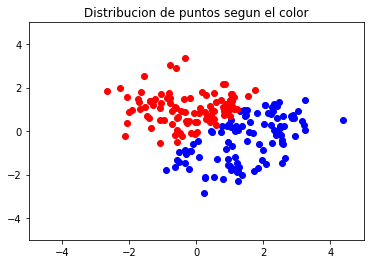

In [182]:
visualize_colors_new(lista_de_predicciones_azul_t, lista_de_predicciones_rojo_t,[],[],[])

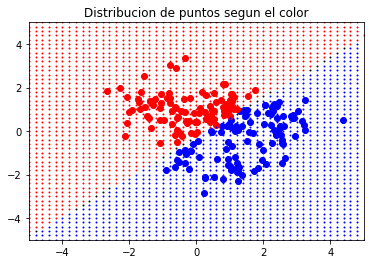

In [183]:
visualize_colors_new(lista_de_predicciones_azul_t, lista_de_predicciones_rojo_t,lista_de_predicciones_azul_plano_t,lista_de_predicciones_rojo_plano_t,lista_de_predicciones_negro_plano_t)